# **Not an ideal network**

In [0]:
# https://keras.io/

# Install Keras from python package manager and q is for quiet mode. 
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing packages
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
# Loading training data in X_train and y_train and testing or validation data 
# in X_test, y_test.

# X variables have the pixel value of the digits and y variables have the digit information.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


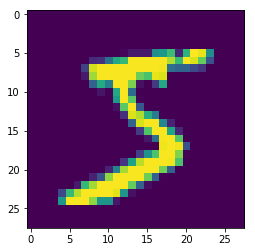

In [0]:
# Printing the shape or dimension of X_train. This will help us know the number of images in training data.
print (X_train.shape)

# Importing plotting package and to display the first image of the training dataset.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# X variable for training and testing is reshaped to 4 dimension from 3 dimension by 
# adding channel as dimension. In the case of black and white image, channel is 1.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Normalizing the pixel value between 0 and 1.
# Since values range from 0 to 255, dividing it by 255 to get within the value of 0 and 1.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Displaying the first ten digits
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# This is one-hot encoding,
# Converting the y values from digit to binary variable of 10 classes (0-9)
# The value is 1 for that particular digit 
# i.e. digit 5 means column number 6 will be 1 and other columns would be 0.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Displaying y_train as one-hot encoded variables.
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Building the network.
# Adding convolution layers (# of filters and filter size), with activation as relu
# Flattening the output of the last convolution layer
# Applying softmax, to get probability-like value for 10 digit class.

from keras.layers import Activation, MaxPooling2D

model = Sequential() 

# Input channel dimension = (28,28,1)
# Receptive field = 3
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Input channel dimension = (26,26,32)
# Receptive field = 5
model.add(Convolution2D(64, 3, 3, activation='relu'))

# Input channel dimension = (24,24,64)
# Receptive field = 7
model.add(Convolution2D(128, 3, 3, activation='relu'))

# Input channel dimension = (22,22,128)
# Receptive field = 14
model.add(MaxPooling2D(pool_size=(2, 2)))

# Input channel dimension = (11,11,128)
# Receptive field = 16
model.add(Convolution2D(256, 3, 3, activation='relu'))

# Input channel dimension = (9,9,256)
# Receptive field = 18
model.add(Convolution2D(512, 3, 3, activation='relu'))

# Input channel dimension = (7,7,512)
# Receptive field = 20
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# Input channel dimension = (5,5,1024)
# Receptive field = 22
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# Input channel dimension = (3,3,2048)
# Receptive field = 24
model.add(Convolution2D(10, 3, 3, activation='relu'))

# Input channel dimension = (1,1,10)
# Receptive field = 26
model.add(Flatten())

model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 1.9053 - acc: 0.1933
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.9133 - acc: 0.1884
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - a

In [0]:
# Model is evaluated on the testing dataset.
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# The score prints the loss and the test accuracy.
print(score)

[2.3025851249694824, 0.098]


In [0]:
#print(model.metrics_names)

['loss', 'acc']


In [0]:
# Prediction of the test images.
y_pred = model.predict(X_test)

In [0]:
# Shows the predicted y value from the model - probability of the digit.
# Model has not learnt anything as the default probability is 0.1
print(y_pred[:9])

# Prints the actual digit for y_test dataset.
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


The issue with the model is that in the last convolutional layer -- the number of filters have reduced drastically from 2048 to 10. So lot of information which was in the 2048 kernels is lost and the last layer has to retain 10 filters, in which all the learnt information cannot be held, hence the accuracy is very low. Those 2048 filter's information has to be properly mixed up so that the relevant information is carried on, using 1* 1 convolution.

Besides, that for a simple image of 28*28, a model of 25 million parameters is too big than needed. The number of kernels can be reduced to make a simpler model.

